# Science Saturday 5

In [1]:
# Global imports
import matplotlib.pyplot as plt
import pandas as pd
from tabulate import tabulate

In [2]:
# Plotting things
plt.xkcd()
colors = ['maroon','moccasin']

In [3]:
## Reading in data and re-organizing it into something easier to analyze. 
## Throwig out the tests were there was a Rosé wine.
a = pd.read_csv('../data/SS5_redvsWhiteGroup1.csv') 
b = pd.read_csv('../data/SS5_redvsWhiteGroup2.csv') 

c = pd.concat([a,b],ignore_index=True) 
idx = c.wine2_color=='Rose'
c = c[~idx]
c.columns

Index(['case', 'guesser', 'wine1', 'wine1_number', 'wine1_color',
       'wine1_guess', 'wine1_rating', 'wine1_correct', 'wine2', 'wine2_number',
       'wine2_color', 'wine2_guess', 'wine2_rating', 'wine2_correct'],
      dtype='object')

In [4]:
wine1 = c[['case', 'guesser', 'wine1', 'wine1_number', 'wine1_color','wine1_guess', 'wine1_rating', 'wine1_correct']].copy()
wine2 = c[['case', 'guesser', 'wine2', 'wine2_number', 'wine2_color','wine2_guess', 'wine2_rating', 'wine2_correct']].copy()

wine2.columns = wine2.columns.str.replace('wine2','wine1')

tab = pd.concat([wine1,wine2],ignore_index=True)

tab.columns = ['case', 'guesser', 'wine', 'wine_number', 'wine_color','wine_guess', 'wine_rating', 'wine_correct']
tab

,case,guesser,wine,wine_number,wine_color,wine_guess,wine_rating,wine_correct
0,1,Keira,Port,1,Red,Red,4.0,True
1,1,Jenna,Port,1,Red,White,1.0,False
2,1,Matt_G,Port,1,Red,Red,4.0,True
3,1,Tyler,Port,1,Red,NaN,NaN,NaN
4,1,Roberto,Port,1,Red,White,4.0,False
...,...,...,...,...,...,...,...,...
175,13,Katie,Chardonnay,2,White,Red,3.0,False
176,15,Rachel,Pinot Grigio,5,White,White,3.0,True
177,15,Jo,Pinot Grigio,5,White,White,3.0,True
178,15,Dzhuliya,Pinot Grigio,5,White,NaN,NaN,NaN


### Question 1
The simplest analysis that can be done is to figure out what percentage of wines were guessed correctly, regardless of what color they were paired with. Some of the tests included Rose, but those have been excluded in this portion of the analysys. (The guessers were not told there would be a third type of wine, right?)

In [5]:
q1 = tab.wine_correct.sum()/tab.wine_correct.count()
print(f'Overall, {100*q1:.1f}% of wines were identified correctly.')

Overall, 72.4% of wines were identified correctly.


wine_color
Red      0.723404
White    0.724138
Name: wine_correct, dtype: float64

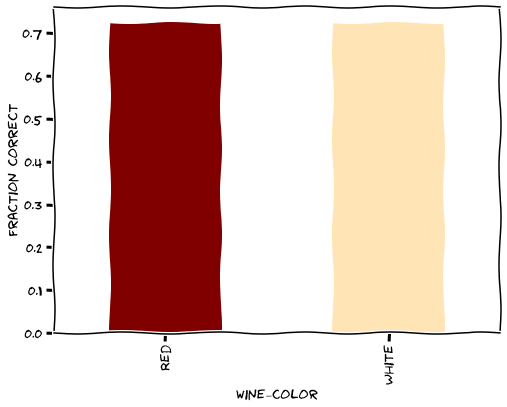

In [6]:
q1a = tab.groupby('wine_color')['wine_correct'].sum()/tab.groupby('wine_color')['wine_correct'].count()
q1a.plot(kind='bar',color=colors,figsize=(8,6))
plt.ylabel('Fraction correct')
plt.savefig('q1a.png',bbox_inches='tight')
q1a

### Question 2
A different question to ask is, given a pair of red and white wines, ignoring what order they were served in, how many times were both wines identified correctly?

In [7]:
q2tab = c[c.wine1_color != c.wine2_color]
q2 = (q2tab.wine1_correct & q2tab.wine2_correct).sum()/len(q2tab)
print(f'When the two wines in a test were different, they were both guessed correctly {100*q2:.1f}% of the time.')

When the two wines in a test were different, they were both guessed correctly 53.7% of the time.


### Question 3
Next we look at the results taking into account the different permutations. The table was broken down This is going to be annoying.

In [8]:
rw = c[(c.wine1_color=='Red')&(c.wine2_color=='White')]
wr = c[(c.wine1_color=='White')&(c.wine2_color=='Red')]
rr = c[(c.wine1_color=='Red')&(c.wine2_color=='Red')]
ww = c[(c.wine1_color=='White')&(c.wine2_color=='White')]

In [9]:
P = pd.DataFrame([[rw.wine1_correct.sum()/len(rw),rw.wine2_correct.sum()/len(rw),len(rw)],
                 [wr.wine1_correct.sum()/len(wr),wr.wine2_correct.sum()/len(wr),len(wr)],
                 [rr.wine1_correct.sum()/len(rr),rr.wine2_correct.sum()/len(rr),len(rr)],
                 [ww.wine1_correct.sum()/len(ww),ww.wine2_correct.sum()/len(ww),len(ww)]],
                 index=['R->W','W->R','R->R','W->W'],
                 columns=['First','Second','N samples']
                )
P[['First','Second']] = P[['First','Second']]*100
print(tabulate(P,tablefmt='rst',headers=P.columns))

====  =======  ========  ===========
..      First    Second    N samples
====  =======  ========  ===========
R->W  71.7391   69.5652           46
W->R  25        75                 8
R->R  55.5556   51.8519           27
W->W  22.2222   66.6667            9
====  =======  ========  ===========


### Question 4
Now we see which wines were determined correctly, broken down by wine types. 

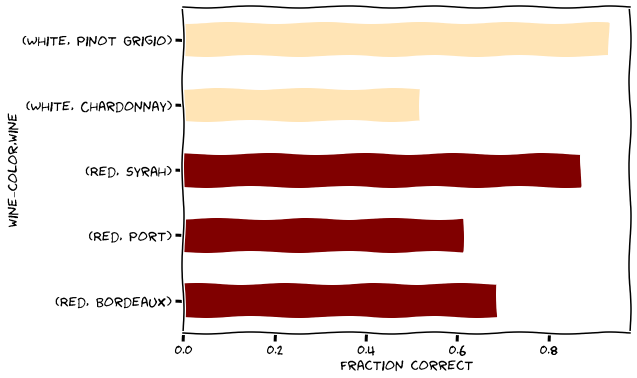

In [10]:
q4tab = tab.groupby(['wine_color','wine'])['wine_correct'].sum()/\
        tab.groupby(['wine_color','wine'])['wine_correct'].count()
colors = ['maroon']*q4tab.loc['Red'].count() + ['moccasin']*q4tab.loc['White'].count()
q4tab.plot(kind='barh',color=colors,figsize=(8,6))
plt.xlabel('Fraction correct')
plt.savefig('q4.png',bbox_inches='tight')

### Question 5
Now let's see how the individual guessers did.

wine_color,Red,White
guesser,,
Dzhuliya,0.700000,1.000000
Jenna,0.666667,0.875000
Jo,0.833333,0.500000
Katie,0.833333,0.428571
Keira,0.833333,0.875000
Matt_G,0.571429,0.600000
Rachel,0.666667,0.625000
Roberto,0.583333,0.857143
Tyler,0.800000,1.000000


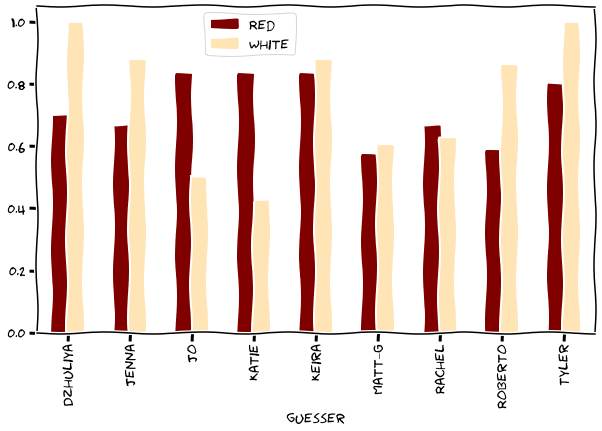

In [11]:
q5tab = tab.groupby(['guesser','wine_color'])['wine_correct'].sum().unstack()/\
        tab.groupby(['guesser','wine_color'])['wine_correct'].count().unstack()
q5tab.plot(kind='bar',color=['maroon','moccasin'],figsize=(10,6))
plt.legend(loc=(0.3,0.85))
plt.savefig('q5.png',bbox_inches='tight')
q5tab

### Wine ratings

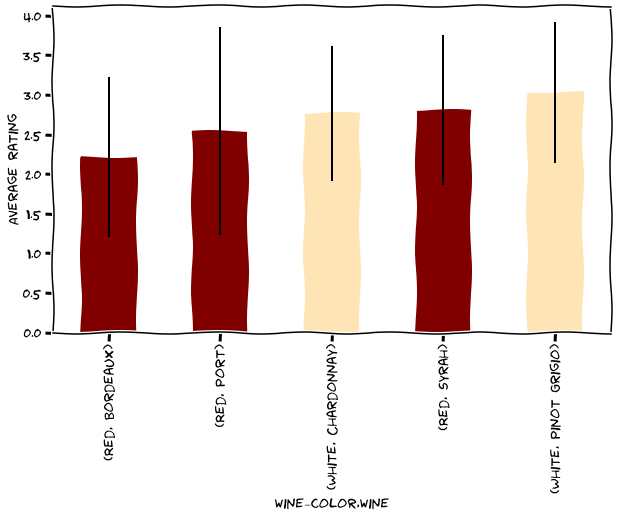

In [12]:
ratings = tab.groupby(['wine_color','wine'])['wine_rating'].agg([np.mean,np.std])
colors = ['maroon']*q4tab.loc['Red'].count() + ['moccasin']*q4tab.loc['White'].count()
ratings['plotcolor'] = colors
ratings.sort_values('mean',inplace=True)

ratings.plot(kind='bar',color=ratings.plotcolor,figsize=(10,6),
             y='mean',yerr='std',legend=False
            )
plt.ylabel('Average rating')
plt.savefig('wine_ratings.png',bbox_inches='tight')